In [68]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
f=pd.read_csv("final_cccf.csv")
df=f.copy()

<Axes: >

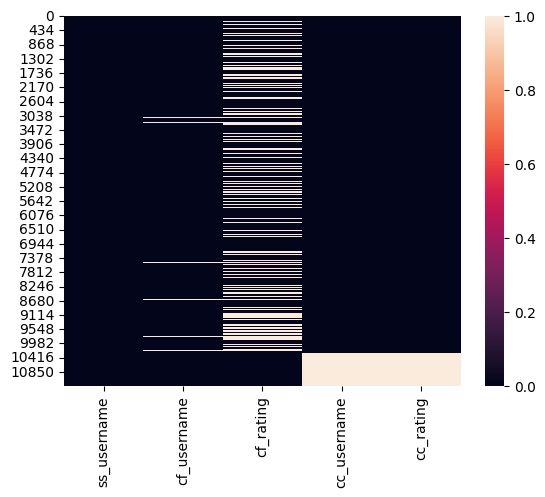

In [70]:
sns.heatmap(df.isnull())


In [71]:
df["cc_rating"].isnull().sum()

995

In [72]:
df["cf_rating"].isnull().sum()

3838

In [73]:
filter= (pd.notna(df["cf_rating"]) & pd.notna(df["cc_username"]))
final =df[filter]
final
data=final.copy()

In [74]:
data

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0
5,aurinegro,aurinegro,2202.0,aurinegro,2628.0
6,retrograd,retrograd,2262.0,retrograd,2628.0
7,chris19,anudeep2011,2023.0,anudeep2011,2565.0
...,...,...,...,...,...
10269,Prince_Raj,daud43,624.0,praj0609,580.0
10270,Notanonymous,bhardwajarpit1998,1182.0,arpit_987,569.0
10272,yash1399,yash1399,979.0,yash1399,518.0
10274,hihihihipathak,praveenpathak,1581.0,hihihihipathak,460.0


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6442 entries, 0 to 10278
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ss_username  6442 non-null   object 
 1   cf_username  6442 non-null   object 
 2   cf_rating    6442 non-null   float64
 3   cc_username  6442 non-null   object 
 4   cc_rating    6442 non-null   float64
dtypes: float64(2), object(3)
memory usage: 302.0+ KB


In [76]:
cc_mean=data["cc_rating"].mean()
cc_std=data["cc_rating"].std()
cf_mean=data["cf_rating"].mean()
cf_std=data["cf_rating"].std()


data["cc_rating"]= (data["cc_rating"]-cc_mean)/cc_std
data["cf_rating"]= (data["cf_rating"]-cf_mean)/cf_std

In [77]:
shuffle = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [78]:
split = int(shuffle.shape[0] * 0.8)

In [79]:
df_train = shuffle[:split]
df_test = shuffle[split:]

In [80]:
X_train = df_train.drop('cf_rating', axis=1)
y_train = df_train['cf_rating'].to_frame()
X_test = df_test.drop('cf_rating', axis=1)
y_test = df_test['cf_rating'].to_frame()


In [81]:
y_train

,cf_rating
0,-0.080871
1,1.547332
2,-2.372417
3,-1.226644
4,-0.310026
...,...
5148,-0.499983
5149,-0.677879
5150,-0.340178
5151,-1.519118


Text(0, 0.5, 'CF')

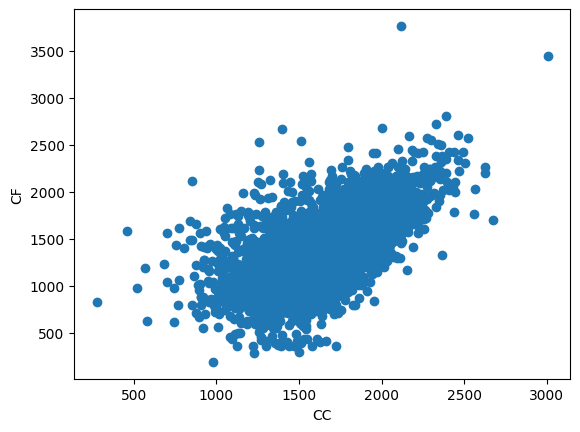

In [82]:
plt.scatter(df["cc_rating"],df["cf_rating"])
plt.xlabel("CC")
plt.ylabel("CF")

Text(0, 0.5, 'CF')

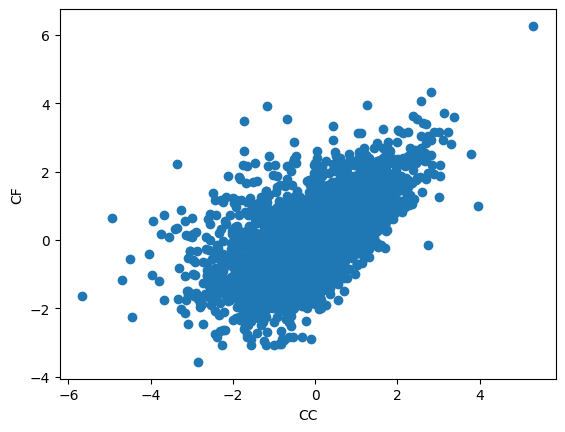

In [83]:
plt.scatter(X_train["cc_rating"],y_train["cf_rating"])
plt.xlabel("CC")
plt.ylabel("CF")

In [90]:
x=X_train
def gradientDescent(new_m, new_b,df_train,alpha):
    m=0
    b=0
    n=df_train.shape[0]
    for i in range(n):
        x=df_train.iloc[i].cc_rating
        y=df_train.iloc[i].cf_rating
        m=m+ (-2/n)*x*(y-(new_m*x+new_b))
        b=b+ (-2/n)*(y-(new_m*x+new_b))
    m_final= new_m - m*alpha
    b_final= new_b - b*alpha
    return m_final , b_final 

M=0
B=0
L=0.001
iterations=1000

for i in range(iterations):
    M,B=gradientDescent(M,B,df_train,L)

print(M,B)
    
    

0.5448696234613906 0.0082884374238302


### Slope and Intercept may vary with each 'RUN ALL' due to shuffling and spiliting of dataset

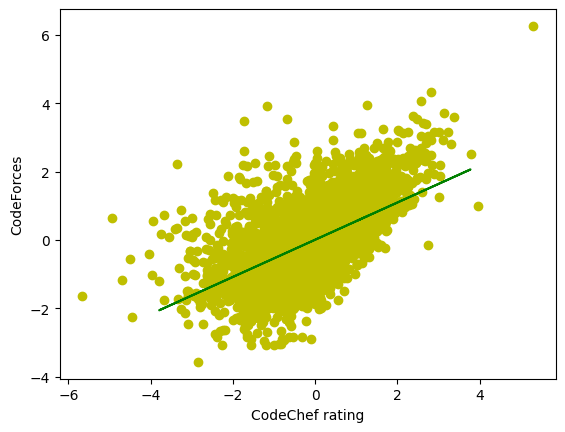

In [106]:
def plot_regression_line(x, y, m, b ):
    plt.scatter(x["cc_rating"], y_train["cf_rating"], color = "y",marker = "o")
  
    
    y_test["cf_rating"] = X_test["cc_rating"] * m + b
    plt.plot(X_test["cc_rating"], y_test["cf_rating"], color = "g")
    plt.xlabel('CodeChef rating')
    plt.ylabel('CodeForces')
    plt.show()
  
plot_regression_line(X_train,y_train,M,B)

In [100]:
y_pred= M * final["cc_rating"] + B 

In [103]:
y_pred.to_frame().rename(columns={"cc_rating": "cf_rating"})

,cf_rating
0,1638.431246
4,1456.444792
5,1431.925659
6,1431.925659
7,1397.598873
...,...
10269,316.032670
10270,310.039104
10272,282.250753
10274,250.648315
